<a href="https://colab.research.google.com/github/mmbs1989/DSWP-Aluno/blob/main/TCCfinalpib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccdata.csv")
dfa = pd.read_csv("https://raw.githubusercontent.com/mmbs1989/DSWP-Aluno/main/dadostccpib.csv")
df = df.drop(df.index[314:])
dfa = dfa.drop(dfa.index[314:])
df['pib'] = dfa['pib']
df['pib'] = pd.to_numeric(df['pib'])
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)


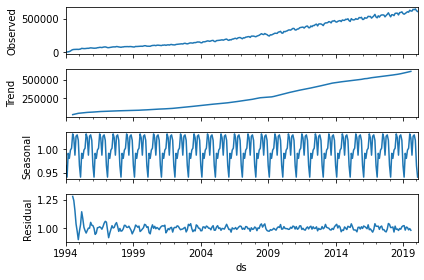

In [27]:
result = seasonal_decompose(df, model='multiplicative')
fig = result.plot()

In [28]:
df.tail(30)

,y
ds,
2017-09-01,528871
2017-10-01,549305
2017-11-01,566209
2017-12-01,588893
2018-01-01,555645
2018-02-01,528906
2018-03-01,560121
2018-04-01,559360
2018-05-01,547017


In [5]:
df.dtypes

y    int64
dtype: object

In [6]:
print(df.shape)

(314, 1)


In [29]:
df.describe()

,y
count,314.000000
mean,269371.283439
std,184225.641732
min,4563.000000
25%,101859.000000
50%,216359.000000
75%,448483.500000
max,647460.000000


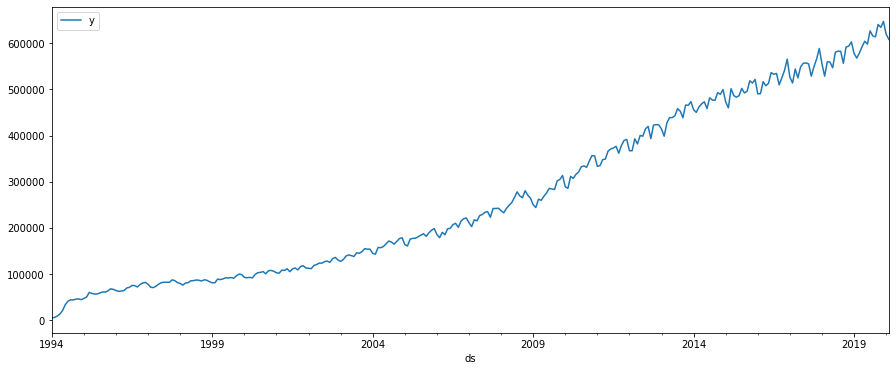

In [30]:
df.plot(figsize=(15,6))

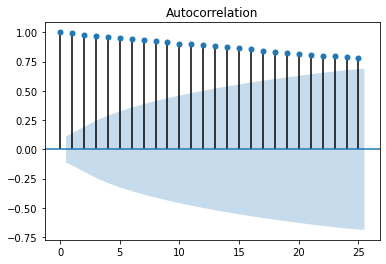

In [31]:
plot_acf(df)
plt.show()

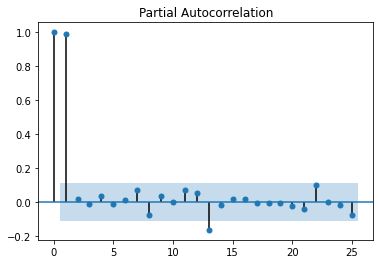

In [32]:
plot_pacf(df)
plt.show()

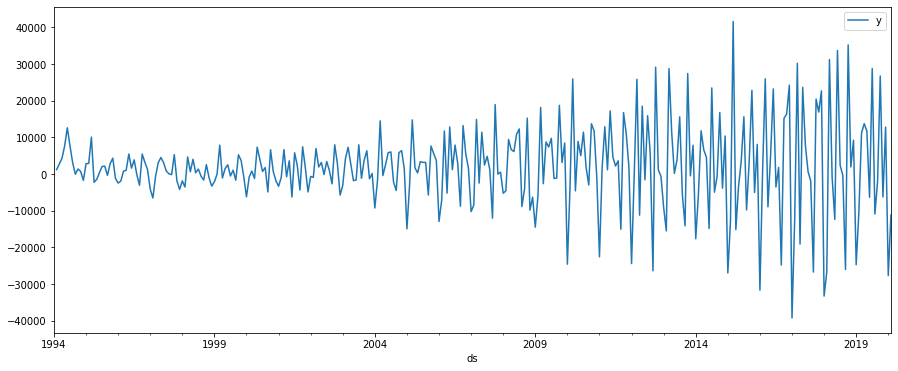

In [33]:
df.diff().plot(figsize=(15,6))

In [40]:
arima = ARIMA(df, freq='MS', order=(1,1,2)).fit()
(arima.resid ** 2).mean()

102272865.78977248

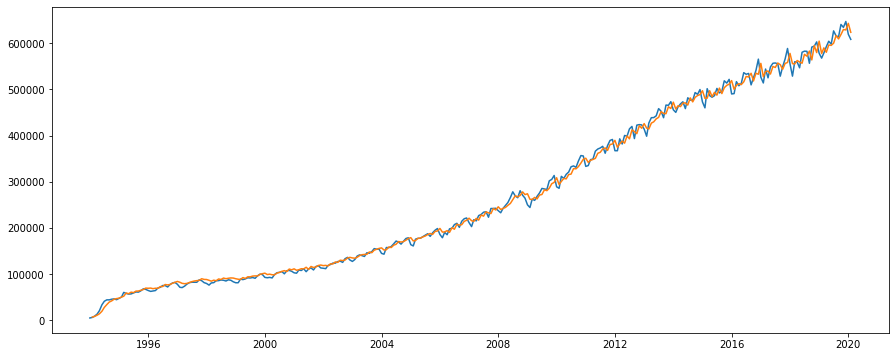

In [41]:
plt.figure(figsize=(15,6))
plt.plot(df)
plt.plot(arima.predict(typ='levels'))

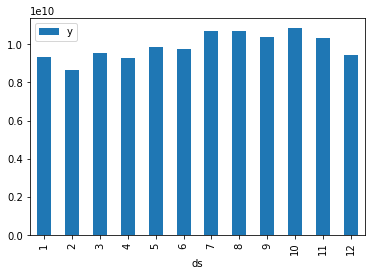

In [15]:
df.groupby(df.index.month).mean().plot(kind='bar')